# MATALA 2

### by : 
###      Shir Saadi 207378415

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
PATH = "C:\\Users\\shirs\\Desktop\\shir saadi\\שנה ג סמסטר ב\\כרייה וניתוח נתונים מתקדם בפייתון\\מטלות\\מטלה 2\\matala2_cosmetics_2019-Nov.csv"
data = pd.read_csv(PATH) 
data.head()

C:\Users\shirs\AppData\Local\Temp\ipykernel_7652\1326818623.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(PATH)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


## Q1 : 

In [3]:
# convert a string into a pandas DateTime object
data['event_time'] = pd.to_datetime(data['event_time'])

# sort data by user_id, user_session, and event_time
data.sort_values(['user_id', 'user_session','event_time'], inplace=True)
data.reset_index(inplace=True, drop=True) 

#חישוב הפרש זמן בשניות בין כל אירוע לאירוע הבא, באותו הביקור
#קיבוץ על בסיס מזהה_משתמש ועל מזהה ביקור,וחישוב הפרש זמן בשניות על זמן_אירוע
data['duration_to_next_event'] = (data.groupby(['user_id', 'user_session'])['event_time'].diff().dt.total_seconds().fillna(0))


## Q2 : 

In [4]:
# sort data by event_time ,user_id and user_session 
data.sort_values([ 'event_time','user_id', 'user_session'], inplace=True)

# חישוב הפרש ימים בין אירוע לאירוע עבור כל מזהה_משתמש
data['day_time_diff'] = data.groupby(['user_id'])['event_time'].diff().dt.days.fillna(0)

#עבור כל פעם בהם בין שורה לשורה (עבור אותו מזהה_משתמש) יש מעל 5 ימים - מבצע סכימה של מספר הפעמים שתנאי זה מתקיים (כמובן עבור כל מזהה_משתמש) כדי לקבל את מספר הפאנל
data['funnel_number'] = (data['day_time_diff'] > 5).groupby(data['user_id']).cumsum() + 1

#מייון נוסף
data.sort_values(['user_id','event_time', 'user_session'], inplace=True)
data.reset_index(inplace=True, drop=True)

del data['day_time_diff']


## Q3 : 

In [5]:
data['index_in_funnel'] = data.groupby(['user_id', 'funnel_number']).cumcount() + 1

## Q4 : 

In [6]:
import re

#פונקציה שמתקנת ערך מסויים להכיל רק ספרות ונקודות
def extract_price(price_to_fix):
    price = re.findall('[0-9.]+', str(price_to_fix))
    return float(price[0]) ## הוספתי את ה-אפס כי לקבל את המקום האפס במערך

# מבצע את הפונקציה על כל ערך בעמודת המחיר
data['price'] = data['price'].apply(extract_price)

#לרוב פונקציה אפעיל על עדכון עמודה קיימת ואגרגציה אפעיל על יצירת עמודה חדשה

data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
0,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
1,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
3,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0.0,1,3
4,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,4


## Q5 : 

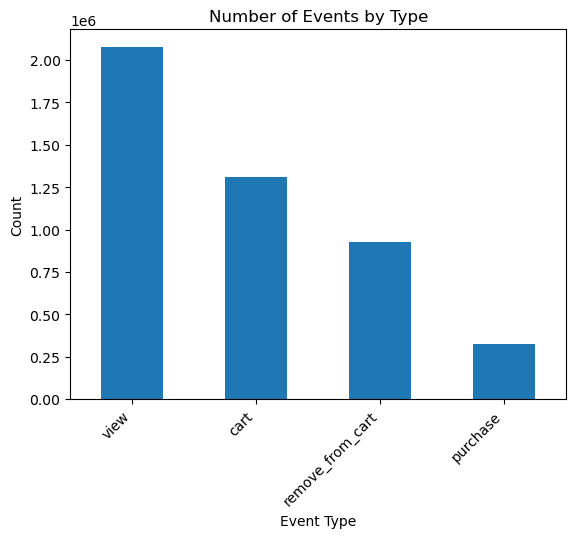

In [7]:
import matplotlib.pyplot as plt

event_count = data['event_type'].value_counts()
#דרך נוספת:
#event_count = data.groupby('event_type').size()

ax=event_count.plot(kind='bar')
ax.set_xticklabels(event_count.index, rotation=45, ha='right')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Number of Events by Type')
plt.show()


## Q6 : 
#### חשוב לציין שבנוגע לסעיפי הרשימות, במקרה ואין אירוע מסוג זה המתאים לביקור מסויים יופיע הערך 0 ולא ערך ריק 

### a,b,c,d.

In [8]:
session_data = data[['user_id', 'user_session', 'funnel_number', 'index_in_funnel']]

### e. מספר האירועים הכולל שביצוע המשתמש באותו ביקור 

In [9]:
session_data['sum_of_events_in_session'] = data.groupby(['user_id', 'user_session']).cumcount() + 1 #ספירה המתחילה מ1

C:\Users\shirs\AppData\Local\Temp\ipykernel_7652\3093066697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sum_of_events_in_session'] = data.groupby(['user_id', 'user_session']).cumcount() + 1 #ספירה המתחילה מ1


### f. משך הביקור באתר 

In [10]:
#בניית טבלה חדשה שמייצרת עמודה של זמן ביקור באתר בשניות ,עבור ביקור מסויים
time_in_session_in_seconds = data.groupby('user_session').agg({'event_time': lambda x: (max(x) - min(x)).seconds})
#איחוד הטבלאות ועדכון הטבלה הרלוונטית על בסיס מספר ביקור 
session_data = session_data.merge(time_in_session_in_seconds, on=['user_session'], how='left')
#שינוי שם עמודה לשם חדש
session_data = session_data.rename(columns={'event_time': 'time_in_session_in_seconds'})

### g. list_of_viewed - רשימת מוצרים שבהם צפה המשתמש בביקור 

In [11]:
#בניית טבלה חדשה שמייצרת עמודה של רשימת מוצרים שבהם צפה המשתמש ,עבור ביקור מסויים
list_of_viewed = data[data['event_type'] == 'view'].groupby('user_session').agg({'product_id': lambda x: list(set(x))})
#איחוד הטבלאות ועדכון הטבלה הרלוונטית על בסיס מספר ביקור 
session_data = session_data.merge(list_of_viewed, on=['user_session'], how='left')
#שינוי שם עמודה לשם חדש
session_data = session_data.rename(columns={'product_id': 'list_of_viewed'})

### h. list_of_added_to_cart – רשימת המוצרים שנוספו לעגלה בביקור 

In [12]:
#בניית טבלה חדשה שמייצרת עמודה של רשימת המוצרים שנוספו לעגלה ,עבור ביקור מסויים
list_of_added_to_cart = data[data['event_type'] == 'cart'].groupby('user_session').agg({'product_id': lambda x: list(set(x))})
#איחוד הטבלאות ועדכון הטבלה הרלוונטית על בסיס מספר ביקור 
session_data = session_data.merge(list_of_added_to_cart, on=['user_session'], how='left')
#שינוי שם עמודה לשם חדש
session_data = session_data.rename(columns={'product_id': 'list_of_added_to_cart'})

### i. list_of_purchased – רשימת המוצרים שנרכשו בביקור 

In [13]:
#בניית טבלה חדשה שמייצרת עמודה של רשימת מוצרים שרשימת המוצרים שנרכשו,עבור ביקור מסויים
list_of_purchased = data[data['event_type'] == 'purchase'].groupby('user_session').agg({'product_id': lambda x: list(set(x))})
#איחוד הטבלאות ועדכון הטבלה הרלוונטית על בסיס מספר ביקור 
session_data = session_data.merge(list_of_purchased, on=['user_session'], how='left')
#שינוי שם עמודה לשם חדש
session_data = session_data.rename(columns={'product_id': 'list_of_purchased'})

session_data.fillna(0, inplace=True)
session_data

,user_id,user_session,funnel_number,index_in_funnel,sum_of_events_in_session,time_in_session_in_seconds,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0.0,[5240],0,0
1,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1,1.0,0.0,[5711145],0,0
2,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2,1.0,0.0,[5814066],0,0
3,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3,1.0,3789.0,"[5905673, 5905674, 5711117, 5542414, 5711122, ...",0,0
4,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,4,2.0,3789.0,"[5905673, 5905674, 5711117, 5542414, 5711122, ...",0,0
...,...,...,...,...,...,...,...,...,...
4635832,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,3,3.0,38.0,"[5886282, 5892179, 5900651]",0,0
4635833,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,4,4.0,38.0,"[5886282, 5892179, 5900651]",0,0
4635834,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,5,5.0,38.0,"[5886282, 5892179, 5900651]",0,0
4635835,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1,1.0,0.0,[5790563],0,0
